# $\varepsilon$ -DP

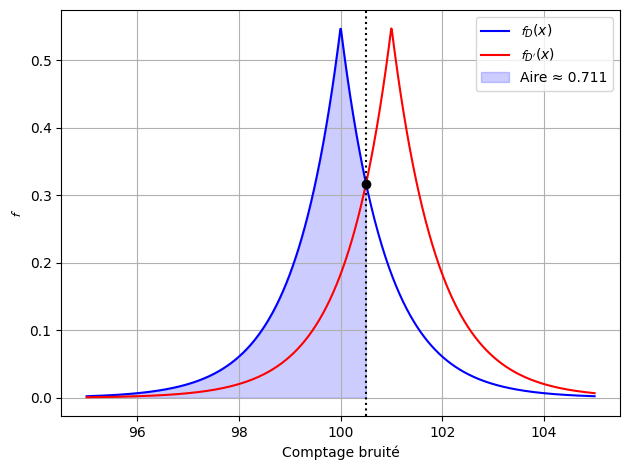

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Paramètres
mu1, mu2 = 100, 101
b = 1 / np.log(3)

# Axe des x
x = np.linspace(95, 105, 1000)

# Densités
y1 = laplace.pdf(x, loc=mu1, scale=b)
y2 = laplace.pdf(x, loc=mu2, scale=b)

# Point limite pour l’aire
x_limit = 100.5
idx_limit = np.where(x <= x_limit)

# Tracé des courbes
plt.plot(x, y1, label=r"$\mathcal{f}_D(x)$", color='blue')
plt.plot(x, y2, label=r"$\mathcal{f}_{D'}(x)$", color='red')

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(x[idx_limit], y1[idx_limit], color='blue', alpha=0.2, label=f"Aire ≈ 0.711")

# Tracer les lignes pointillées
plt.plot(x_limit, laplace.pdf(x_limit, loc=mu1, scale=b), 'o', color='black')
plt.axvline(x=x_limit, linestyle='dotted', color='black')

# Mise en forme
plt.xlabel("Comptage bruité")
plt.ylabel(r"$\mathcal{f}$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

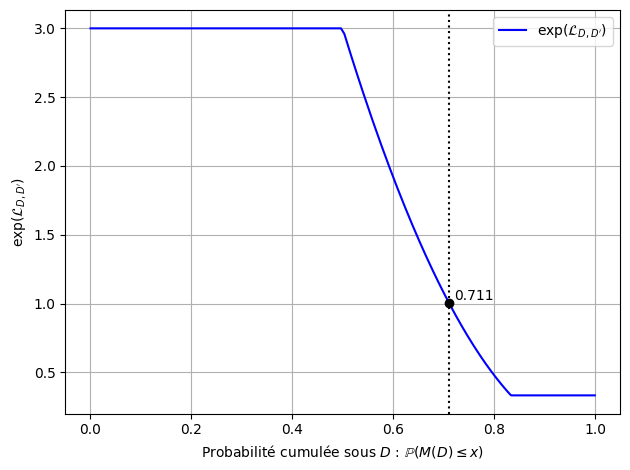

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Paramètres
mu1, mu2 = 100, 101
b = 1 / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = laplace.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = laplace.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = laplace.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

# Trouver le point où exp(𝓛) est le plus proche de 0 (le plus petit)
idx_min = np.argmin(np.abs(ratio -1))
x_min = x[idx_min]
cdf_min = cdf_y1[idx_min]
y_min = ratio[idx_min]

# Tracé
plt.plot(cdf_y1, ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

# Ligne pointillée verticale depuis l’axe des x
plt.axvline(x=cdf_min, linestyle='dotted', color='black')
plt.plot(cdf_min, y_min, 'o', color='black')
plt.text(cdf_min + 0.01, y_min, f"{cdf_min:.3f}", verticalalignment='bottom', color='black')

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$\exp(\mathcal{L}_{D, D'})$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ($\varepsilon, \delta$) -DP

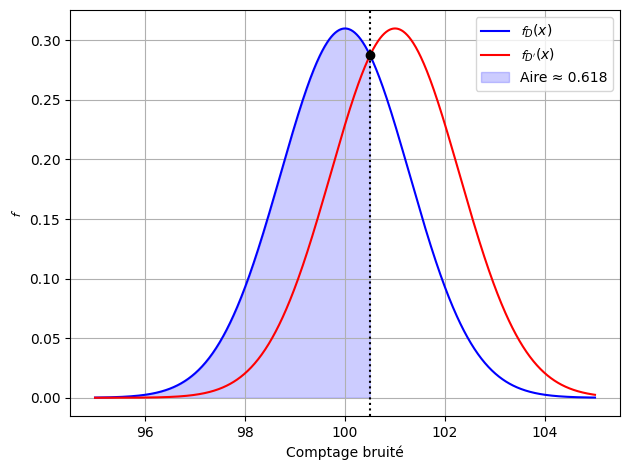

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x
x = np.linspace(95, 105, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)
y2 = norm.pdf(x, loc=mu2, scale=b)

# Point limite pour l’aire
x_limit = 100.5
idx_limit = np.where(x <= x_limit)

# Tracé des courbes
plt.plot(x, y1, label=r"$\mathcal{f}_D(x)$", color='blue')
plt.plot(x, y2, label=r"$\mathcal{f}_{D'}(x)$", color='red')

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(x[idx_limit], y1[idx_limit], color='blue', alpha=0.2, label=f"Aire ≈ 0.618")

# Tracer les lignes pointillées
plt.plot(x_limit, norm.pdf(x_limit, loc=mu1, scale=b), 'o', color='black')
plt.axvline(x=x_limit, linestyle='dotted', color='black')

# Mise en forme
plt.xlabel("Comptage bruité")
plt.ylabel(r"$\mathcal{f}$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

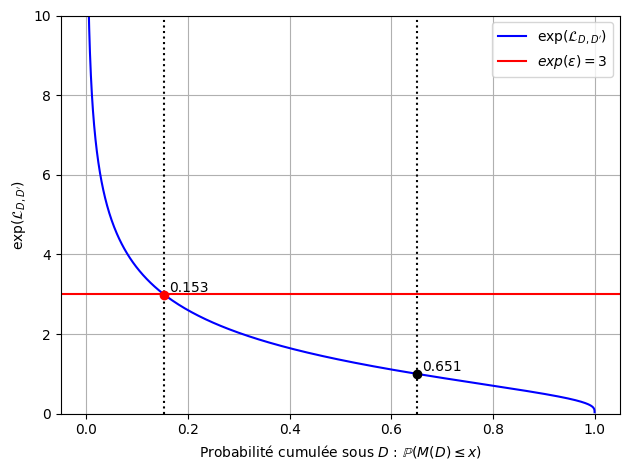

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = norm.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = norm.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

# Trouver le point où exp(𝓛) est le plus proche de 0 (le plus petit)
idx_min = np.argmin(np.abs(ratio -1))
x_min = x[idx_min]
cdf_min = cdf_y1[idx_min]
y_min = ratio[idx_min]

idx_min_2 = np.argmin(np.abs(ratio -3))
x_min_2 = x[idx_min_2]
cdf_min_2 = cdf_y1[idx_min_2]
y_min_2 = ratio[idx_min_2]

# Tracé
plt.plot(cdf_y1, ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

# Ligne pointillée verticale depuis l’axe des x
plt.axvline(x=cdf_min, linestyle='dotted', color='black')
plt.plot(cdf_min, y_min, 'o', color='black')
plt.text(cdf_min + 0.01, y_min, f"{cdf_min:.3f}", verticalalignment='bottom', color='black')

plt.axhline(y=3, color='red', label=r"$exp(\varepsilon) = 3$")

plt.axvline(x=cdf_min_2, linestyle='dotted', color='black')
plt.plot(cdf_min_2, y_min_2, 'o', color='red')
plt.text(cdf_min_2 + 0.01, y_min_2, f"{cdf_min_2:.3f}", verticalalignment='bottom', color='black')

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$\exp(\mathcal{L}_{D, D'})$")
plt.ylim(0,10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


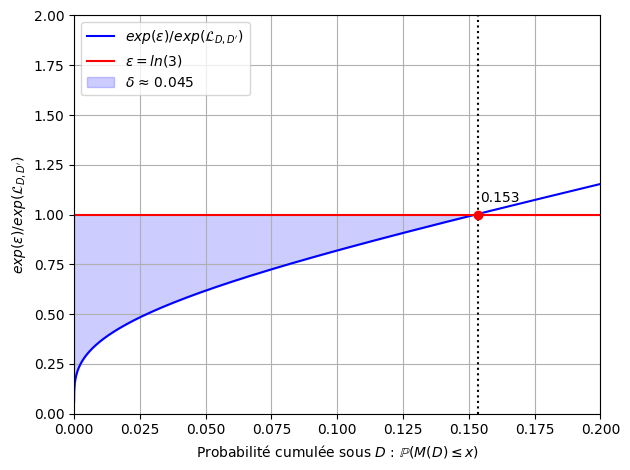

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = norm.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = norm.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

idx_min_2 = np.argmin(np.abs(ratio -3))
x_min_2 = x[idx_min_2]
cdf_min_2 = cdf_y1[idx_min_2]
y_min_2 = ratio[idx_min_2]

# Tracé
plt.plot(cdf_y1, 3/ratio, color='blue', label=r"$exp(\varepsilon)/exp(\mathcal{L}_{D, D'})$")

plt.axhline(y=1, color='red', label=r"$\varepsilon = ln(3)$")
plt.axvline(x=cdf_min_2, linestyle='dotted', color='black')
plt.plot(cdf_min_2, 1, 'o', color='red')
plt.text(cdf_min_2 + 0.001, 1+0.05, f"{cdf_min_2:.3f}", verticalalignment='bottom', color='black')

area = np.trapezoid(1 - 3/ratio[:idx_min_2], cdf_y1[:idx_min_2])

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(cdf_y1[1:idx_min_2], y1= 3/ratio[1:idx_min_2], y2= 1, color='blue', alpha=0.2, label=rf"$\delta$ ≈ {area:.3f}")

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$exp(\varepsilon)/exp(\mathcal{L}_{D, D'})$")
plt.xlim(0,0.2)
plt.ylim(0,2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Composition

/tmp/ipykernel_174855/2100522837.py:8: RuntimeWarning: divide by zero encountered in divide
  delta_gauss = delta / xs
/tmp/ipykernel_174855/2100522837.py:25: RuntimeWarning: divide by zero encountered in log
  gauss_eps = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma[k]
/tmp/ipykernel_174855/2100522837.py:25: RuntimeWarning: invalid value encountered in sqrt
  gauss_eps = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma[k]


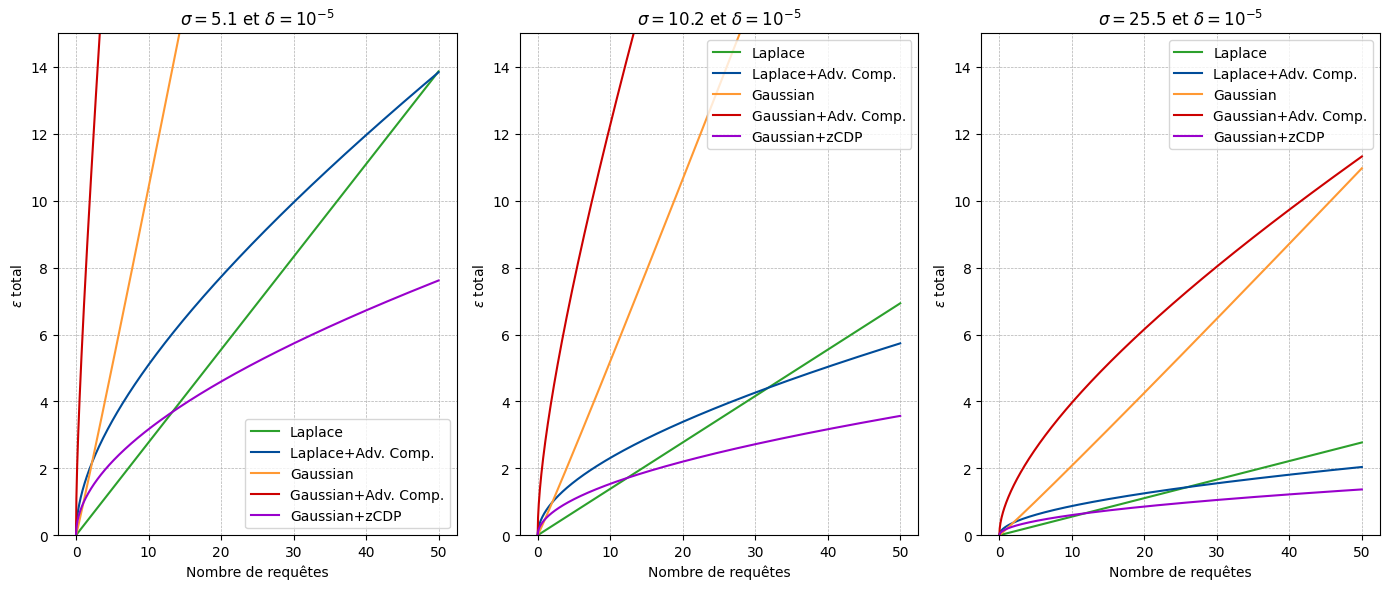

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

# Paramètres
delta = 1e-5
xs = np.linspace(0, 50, 1000)
delta_gauss = delta / xs 
delta_gauss_adv = delta / (xs + 1)

colors = {
    "laplace": "#2ca02c",       # vert
    "laplace_adv": "#004c99",   # bleu foncé
    "gauss": "#ff9933",         # orange
    "gauss_adv": "#cc0000",     # rouge
    "gauss_zcdp": "#9900cc",    # violet
}

sigma = [5.1, 10.2, 25.5]

# Création des graphiques côte à côte
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

for k in range(len(sigma)):
    gauss_eps = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma[k]
    gauss_eps_adv = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma[k]

    ys_gauss = [xs[i] * gauss_eps[i] for i in range(len(xs))]
    ys_gauss_adv = [
        gauss_eps_adv[i] * np.sqrt(2 * xs[i] * np.log(1 / delta_gauss_adv[i])) + xs[i] * gauss_eps_adv[i] * (np.exp(gauss_eps_adv[i]) - 1)
        for i in range(len(xs))
    ]

    rho = 1 / (2 * sigma[k]**2)
    ys_gauss_zcdp = [(x * rho) + 2 * np.sqrt((x * rho) * np.log(1 / delta)) for x in xs]

    lap_eps = np.sqrt(2) / sigma[k]
    ys_lap = [x * lap_eps for x in xs]
    ys_lap_adv = [
        lap_eps * np.sqrt(2 * x * np.log(1 / delta)) + x * lap_eps * (np.exp(lap_eps) - 1)
        for x in xs
    ]

    axs[k].plot(xs, ys_lap, label="Laplace", color=colors["laplace"])
    axs[k].plot(xs, ys_lap_adv, label="Laplace+Adv. Comp.", color=colors["laplace_adv"])
    axs[k].plot(xs, ys_gauss, label="Gaussian", color=colors["gauss"])
    axs[k].plot(xs, ys_gauss_adv, label="Gaussian+Adv. Comp.", color=colors["gauss_adv"])
    axs[k].plot(xs, ys_gauss_zcdp, label="Gaussian+zCDP", color=colors["gauss_zcdp"])
    axs[k].set_xlabel('Nombre de requêtes')
    axs[k].set_ylabel(r'$\epsilon$ total')
    axs[k].set_ylim(0, 15.0)
    axs[k].set_title(rf'$\sigma={sigma[k]}$ et $\delta=10^{{{int(np.log10(delta))}}}$')
    axs[k].legend()
    axs[k].grid(True, linestyle='--', linewidth=0.5)


# Affichage
plt.tight_layout()
plt.show()

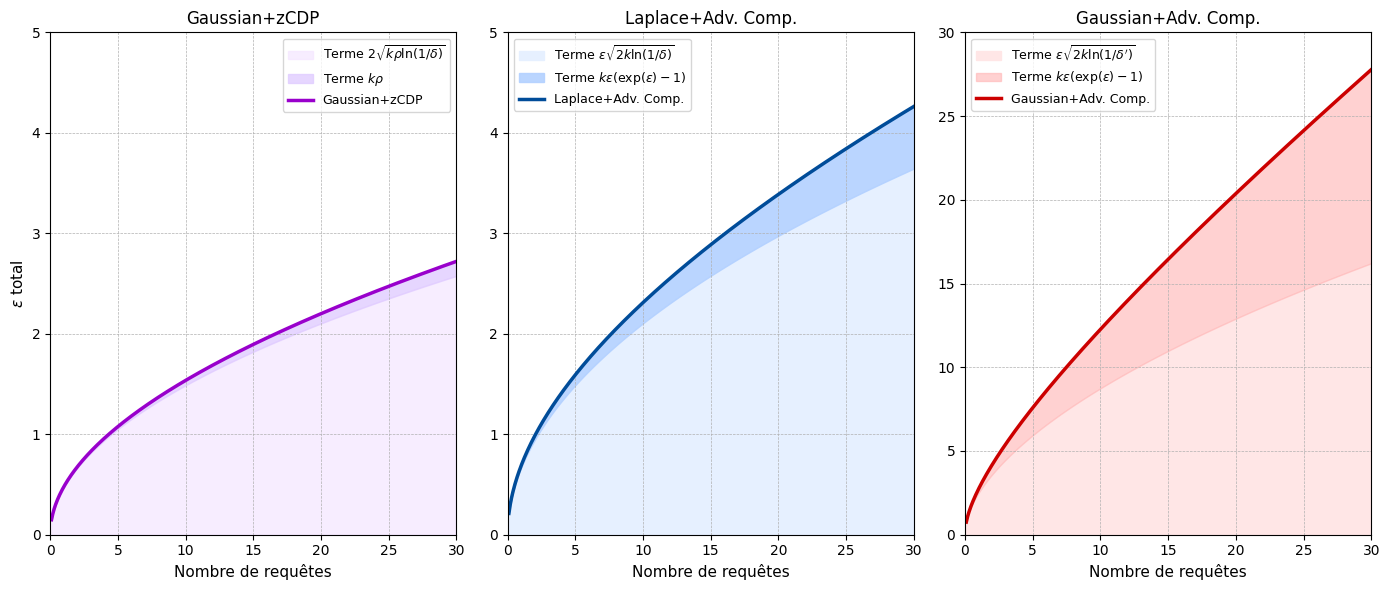

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Palette cohérente
colors = {
    "laplace": "#2ca02c",       # vert (non utilisé ici)
    "laplace_adv": "#004c99",   # bleu foncé
    "gauss": "#ff9933",         # orange (non utilisé ici)
    "gauss_adv": "#cc0000",     # rouge
    "gauss_zcdp": "#9900cc",    # violet
}

# Paramètres
delta = 1e-5
xs = np.linspace(0.1, 50, 1000)
delta_gauss_adv = delta / (xs + 1)
sigma = 10.2

# === Calculs ===

# Gaussian zCDP 
rho = 1 / (2 * sigma**2)
linear_term_zcdp = xs * rho
sqrt_term_zcdp = 2 * np.sqrt((xs * rho) * np.log(1 / delta))
ys_gauss_zcdp = linear_term_zcdp + sqrt_term_zcdp

# Laplace Advanced Composition
lap_eps = np.sqrt(2) / sigma
sqrt_term_lap_adv = lap_eps * np.sqrt(2 * xs * np.log(1 / delta))
exp_term_lap_adv = xs * lap_eps * (np.exp(lap_eps) - 1)
ys_lap_adv = sqrt_term_lap_adv + exp_term_lap_adv

# Gaussian Advanced Composition
gauss_eps_adv = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma
sqrt_term_adv = gauss_eps_adv * np.sqrt(2 * xs * np.log(1 / delta_gauss_adv))
exp_term_adv = xs * gauss_eps_adv * (np.exp(gauss_eps_adv) - 1)
ys_gauss_adv = sqrt_term_adv + exp_term_adv

# === Création des figures ===
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# === Figure 1 : Gaussian+zCDP ===
ax1.fill_between(xs, 0, sqrt_term_zcdp, label=r"Terme $2\sqrt{k\rho\ln(1/\delta)}$", color='#f5e6ff', alpha=0.7)
ax1.fill_between(xs, sqrt_term_zcdp, ys_gauss_zcdp, label=r"Terme $k\rho$", color='#e0ccff', alpha=0.8)
ax1.plot(xs, ys_gauss_zcdp, label=r"Gaussian+zCDP", color=colors["gauss_zcdp"], linewidth=2.5)

ax1.set_title(rf"Gaussian+zCDP", fontsize=12)
ax1.set_xlabel("Nombre de requêtes", fontsize=11)
ax1.set_ylabel(r"$\epsilon$ total", fontsize=11)
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 5)
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.legend(fontsize=9)

# === Figure 2 : Laplace+Adv. Comp. ===
ax2.fill_between(xs, 0, sqrt_term_lap_adv, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta)}$", color='#e6f0ff', alpha=1)
ax2.fill_between(xs, sqrt_term_lap_adv, ys_lap_adv, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#b3d1ff', alpha=0.9)
ax2.plot(xs, ys_lap_adv, label=r"Laplace+Adv. Comp.", color=colors["laplace_adv"], linewidth=2.5)

ax2.set_title(rf"Laplace+Adv. Comp.", fontsize=12)
ax2.set_xlabel("Nombre de requêtes", fontsize=11)
ax2.set_ylabel(r"", fontsize=11)
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 5)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.legend(fontsize=9)

# === Figure 3 : Gaussian+Adv. Comp. ===
ax3.fill_between(xs, 0, sqrt_term_adv, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta')}$", color='#ffe6e6', alpha=1)
ax3.fill_between(xs, sqrt_term_adv, ys_gauss_adv, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#ffb3b3', alpha=0.6)
ax3.plot(xs, ys_gauss_adv, label=r"Gaussian+Adv. Comp.", color=colors["gauss_adv"], linewidth=2.5)

ax3.set_title(rf"Gaussian+Adv. Comp.", fontsize=12)
ax3.set_xlabel("Nombre de requêtes", fontsize=11)
ax3.set_ylabel(r"", fontsize=11)
ax3.set_xlim(0, 30)
ax3.set_ylim(0, 30)
ax3.grid(True, linestyle='--', linewidth=0.5)
ax3.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paramètres
delta = 1e-5
sigma = 10.2
xs = np.linspace(0.1, 100, 10000)

# Préparation de la figure
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot([], [], color="#cc0000", linewidth=2.5, label="Gaussian+Adv. Comp.")
fill1 = fill2 = None

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_xlabel("Nombre de requêtes", fontsize=12)
ax.set_ylabel(r"$\epsilon$ total", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
title = ax.set_title("", fontsize=14)

# Initialisation
def init():
    line.set_data([], [])
    return line,

# Animation
def animate(i):
    global fill1, fill2
    ax.clear()
    alpha = i / 50  # variation de 0 à 1
    delta_gauss_adv = alpha * delta / xs
    delta_prime = delta - xs * delta_gauss_adv
    delta_prime = np.maximum(delta_prime, 1e-12)

    gauss_eps_adv = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma
    sqrt_term_adv = gauss_eps_adv * np.sqrt(2 * xs * np.log(1 / delta_prime))
    exp_term_adv = xs * gauss_eps_adv * (np.exp(gauss_eps_adv) - 1)
    ys_gauss_adv = sqrt_term_adv + exp_term_adv

    ax.fill_between(xs, 0, sqrt_term_adv, label=r"Terme $\varepsilon\sqrt{2k\log(1/\delta')}$", color='#ffe6e6', alpha=0.6)
    ax.fill_between(xs, sqrt_term_adv, ys_gauss_adv, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#ffb3b3', alpha=0.6)
    ax.plot(xs, ys_gauss_adv, label=r"Gaussian+Adv. Comp.", color="#cc0000", linewidth=2.5)

    ax.set_ylim(0, 80)
    ax.set_xlabel("Nombre de requêtes", fontsize=12)
    ax.set_ylabel(r"$\epsilon$ total", fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(rf"Décomposition – Allocation $\delta' = {alpha:.2f} \cdot \delta / k$", fontsize=14)
    ax.legend(fontsize=10)
    return ax.collections + ax.lines

# Création et affichage de l'animation dans le notebook
anim = animation.FuncAnimation(fig, animate, frames=51, init_func=init, blit=False, interval=100)
plt.close(fig)
HTML(anim.to_jshtml())

/tmp/ipykernel_174855/645253275.py:38: RuntimeWarning: divide by zero encountered in divide
  gauss_eps_adv = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma


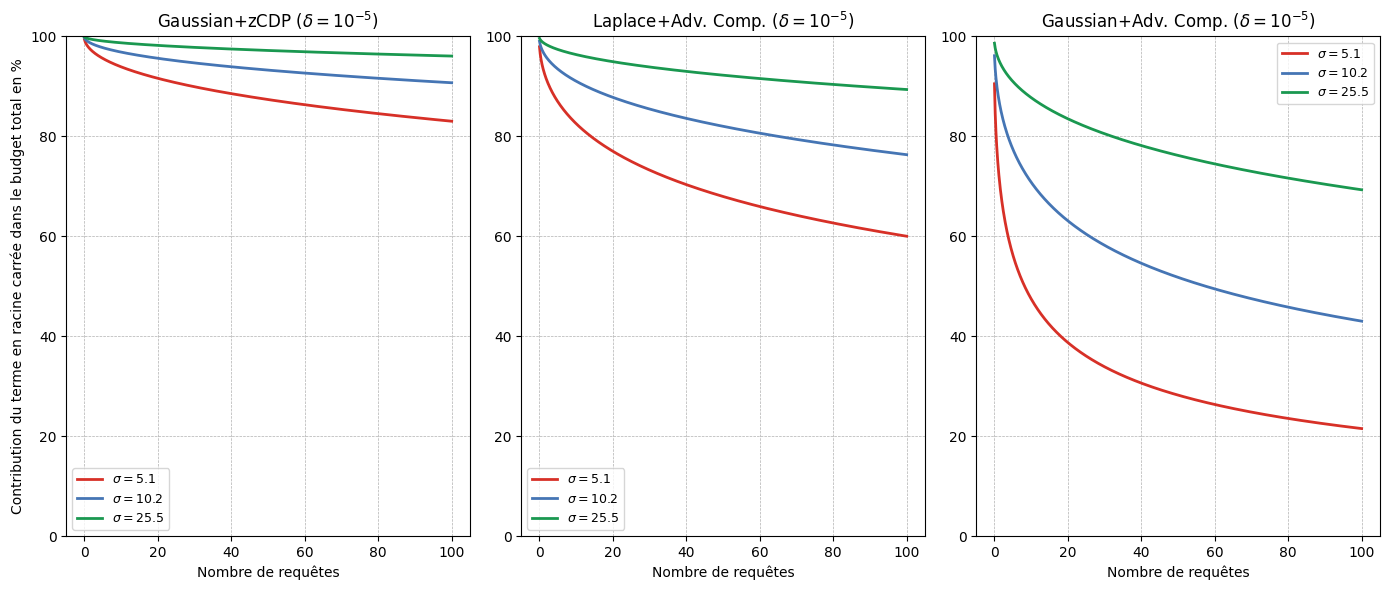

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# === Couleurs par sigma ===
colors = {
    5.1: "#d73027",     # rouge
    10.2: "#4575b4",    # bleu
    25.5: "#1a9850",    # vert
}

# Paramètres
delta = 1e-5
xs = np.linspace(0.1, 100, 1000)
sigmas = [5.1, 10.2, 25.5]

# === Fonctions de calcul ===

def ratio_zcdp(sigma):
    rho = 1 / (2 * sigma**2)
    sqrt_term = 2 * np.sqrt(xs * rho * np.log(1 / delta))
    linear_term = xs * rho
    total = sqrt_term + linear_term
    return 100*sqrt_term / total

def ratio_laplace_adv(sigma):
    eps = np.sqrt(2) / sigma
    sqrt_term = eps * np.sqrt(2 * xs * np.log(1 / delta))
    exp_term = xs * eps * (np.exp(eps) - 1)
    total = sqrt_term + exp_term
    return 100*sqrt_term / total

def ratio_gauss_adv(sigma):
    delta_gauss_adv = delta / (xs + 1)
    eps = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma
    sqrt_term = eps * np.sqrt(2 * xs * np.log(1 / delta_gauss_adv))
    exp_term = xs * eps * (np.exp(eps) - 1)
    total = sqrt_term + exp_term
    return 100*sqrt_term / total

# === Plot ===

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# 1. zCDP
for sigma in sigmas:
    ax1.plot(xs, ratio_zcdp(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax1.set_title(rf"Gaussian+zCDP ($\delta=10^{{{int(np.log10(delta))}}}$)")
ax1.set_xlabel("Nombre de requêtes")
ax1.set_ylabel("Contribution du terme en racine carrée dans le budget total en %")
ax1.set_ylim(0, 100)
ax1.grid(True, linestyle="--", linewidth=0.5)
ax1.legend(fontsize=9)

# 2. Laplace Adv
for sigma in sigmas:
    ax2.plot(xs, ratio_laplace_adv(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax2.set_title(rf"Laplace+Adv. Comp. ($\delta=10^{{{int(np.log10(delta))}}}$)")
ax2.set_xlabel("Nombre de requêtes")
ax2.set_ylabel("")
ax2.set_ylim(0, 100)
ax2.grid(True, linestyle="--", linewidth=0.5)
ax2.legend(fontsize=9)

# 3. Gaussian Adv
for sigma in sigmas:
    ax3.plot(xs, ratio_gauss_adv(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax3.set_title(rf"Gaussian+Adv. Comp. ($\delta=10^{{{int(np.log10(delta))}}}$)")
ax3.set_xlabel("Nombre de requêtes")
ax3.set_ylabel("")
ax3.set_ylim(0, 100)
ax3.grid(True, linestyle="--", linewidth=0.5)
ax3.legend(fontsize=9)

plt.tight_layout()
plt.show()

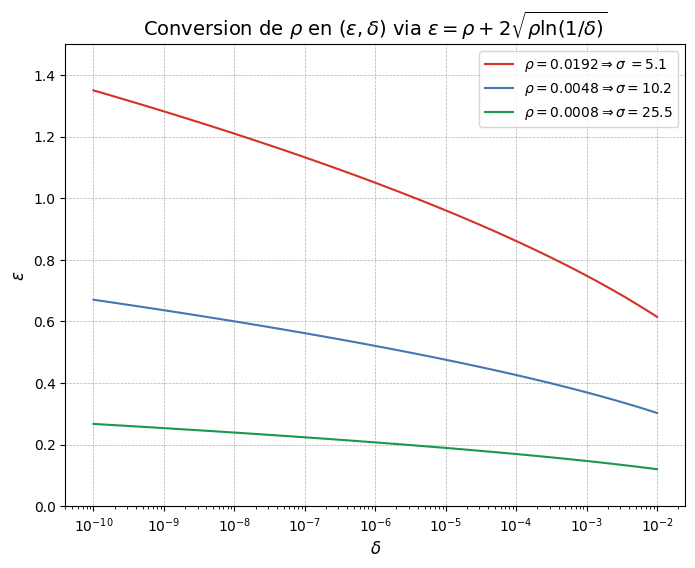

In [73]:
# Plage de valeurs pour delta (échelle logarithmique)
delta_values = np.logspace(-10, -2, 100)

# Définition des écarts types
sigma_1 = 5.1
sigma_2 = 10.2
sigma_3 = 25.5

colors = {
    5.1: "#d73027",     # rouge
    10.2: "#4575b4",    # bleu
    25.5: "#1a9850",    # vert
}

# Calcul de rho en fonction de sigma
rho_1 = 1 / (2 * sigma_1**2)
rho_2 = 1 / (2 * sigma_2**2)
rho_3 = 1 / (2 * sigma_3**2)

# Calcul de epsilon avec la formule avancée
epsilon_values_1 = rho_1 + np.sqrt(4 * rho_1 * np.log(1 / delta_values))
epsilon_values_2 = rho_2 + np.sqrt(4 * rho_2 * np.log(1 / delta_values))
epsilon_values_3 = rho_3 + np.sqrt(4 * rho_3 * np.log(1 / delta_values))

# Création du graphique
plt.figure(figsize=(8, 6))

# Tracé des courbes pour sigma_1, sigma_2 et rho_3
plt.plot(delta_values, epsilon_values_1, color=colors[sigma_1], label=rf'$\rho = {rho_1:.4f} \Rightarrow \sigma_ = {sigma_1:.1f}$')
plt.plot(delta_values, epsilon_values_2, color=colors[sigma_2], label=rf'$\rho = {rho_2:.4f} \Rightarrow \sigma = {sigma_2:.1f} $')
plt.plot(delta_values, epsilon_values_3, color=colors[sigma_3], label=rf'$\rho = {rho_3:.4f} \Rightarrow \sigma = {sigma_3:.1f}$')

# Personnalisation du graphique
plt.xscale("log")
plt.ylim(0, 1.5)
plt.xlabel(r'$\delta$', fontsize=12)
plt.ylabel(r'$\varepsilon$', fontsize=12)
plt.title(r'Conversion de $\rho$ en ($\varepsilon, \delta$) via $\varepsilon = \rho + 2\sqrt{\rho \ln(1/\delta)}$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

In [60]:
from scipy.stats import norm, laplace
import numpy as np

# Paramètres de la loi normale
mu = 0  # Espérance nulle
sigma_values = [5.1, 10.2, 25.5]

for sigma in sigma_values:
    # Calcul des bornes de l'intervalle de confiance à 95%
    lower_bound, upper_bound = norm.ppf([0.025, 0.975], mu, sigma)
    
    # Calcul de la taille de l'intervalle
    interval_size = upper_bound - lower_bound
    print(f"Taille de l'intervalle de confiance à 95% pour sigma = {sigma}: {interval_size}")

    # Paramètre b pour la loi de Laplace (b = sigma / sqrt(2))
    b = sigma / np.sqrt(2)
    
    # Calcul des bornes de l'intervalle de confiance à 95% pour la distribution Laplace
    lower_bound_laplace, upper_bound_laplace = laplace.ppf([0.025, 0.975], loc=mu, scale=b)
    
    # Calcul de la taille de l'intervalle de confiance
    interval_size_laplace = upper_bound_laplace - lower_bound_laplace
    print(f"Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = {sigma}: {interval_size_laplace}")

Taille de l'intervalle de confiance à 95% pour sigma = 5.1: 19.991632642308552
Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = 5.1: 21.60668657354408
Taille de l'intervalle de confiance à 95% pour sigma = 10.2: 39.983265284617104
Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = 10.2: 43.21337314708816
Taille de l'intervalle de confiance à 95% pour sigma = 25.5: 99.95816321154277
Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = 25.5: 108.03343286772042


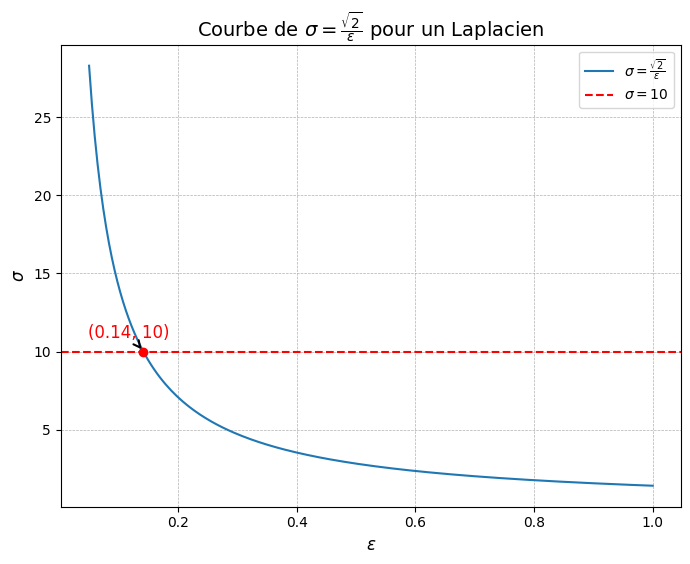

In [44]:
# Plage de valeurs pour epsilon
eps = np.linspace(0.05, 1, 200)

# Calcul des valeurs de sigma
sigma_values = np.sqrt(2) / eps

# Définition de sigma = 10 et calcul de epsilon correspondant
sigma_target = 10
epsilon_target = np.sqrt(2) / sigma_target

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(eps, sigma_values, label=r'$\sigma = \frac{\sqrt{2}}{\varepsilon}$')

# Ajout d'une ligne horizontale pour sigma = 10
plt.axhline(y=sigma_target, color='r', linestyle='--', label=r'$\sigma = 10$')

# Mise en évidence du point correspondant sur la courbe
plt.scatter(epsilon_target, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({epsilon_target:.2f}, {sigma_target})', 
    xy=(epsilon_target, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)

# Personnalisation du graphique
plt.xlabel(r'$\varepsilon$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.title(r'Courbe de $\sigma = \frac{\sqrt{2}}{\varepsilon}$ pour un Laplacien', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

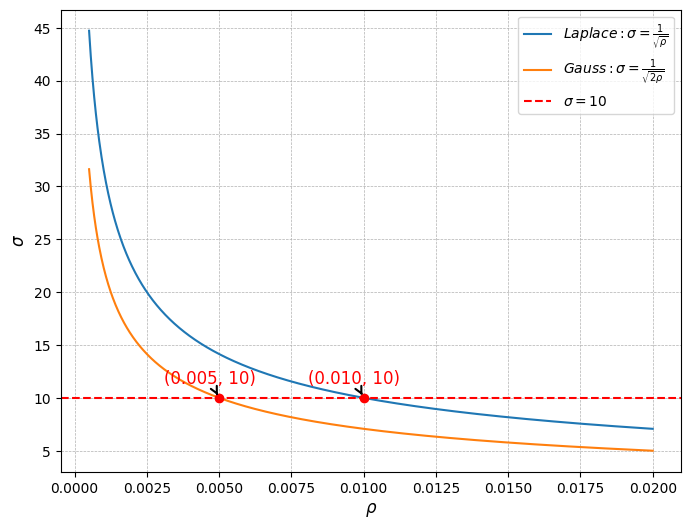

In [45]:
# Plage de valeurs pour epsilon
rho = np.linspace(0.0005, 0.02, 1000)

# Calcul des valeurs de sigma
sigma_values_laplace = 1 / np.sqrt(rho)

sigma_values_gauss = 1 / np.sqrt(2*rho)

# Définition de sigma = 10 et calcul de epsilon correspondant
sigma_target = 10
rho_target_laplace = 1 / sigma_target**2
rho_target_gauss = 1 / (2* sigma_target**2)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(rho, sigma_values_laplace, label=r'$ Laplace : \sigma = \frac{1}{\sqrt{\rho}}$')
plt.plot(rho, sigma_values_gauss, label=r'$ Gauss : \sigma = \frac{1}{\sqrt{2\rho}}$')

# Ajout d'une ligne horizontale pour sigma = 10
plt.axhline(y=sigma_target, color='r', linestyle='--', label=r'$\sigma = 10$')

# Mise en évidence du point correspondant sur la courbe
plt.scatter(rho_target_laplace, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({rho_target_laplace:.3f}, {sigma_target})', 
    xy=(rho_target_laplace, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)

plt.scatter(rho_target_gauss, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({rho_target_gauss:.3f}, {sigma_target})', 
    xy=(rho_target_gauss, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)


# Personnalisation du graphique
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()